
> Utilizar o conjunto de dados ***Social Network Ads***, disponível em: https://www.kaggle.com/rakeshrau/social-network-ads/download ou [Download arquivo](https://drive.google.com/file/d/1840_pUTLcu1VM9avDxpo3t9p6cKV2nmc/view?usp=sharing
)

> Este conjunto de dados (dataset) apresenta dados sobre usuários em uma rede social e seu comportamento de compra. O objetivo do seu projeto final é utilizar ML para responder se um determinado usuário, após clicar em um anúncio na rede social comprará ou não um determinado produto. (Purchased, 0 = não, 1 = sim)





---



# Análise exploratória dos dados e técnicas de pré-processamento caso sejam necessárias

In [ ]:
# --- Importar as bibliotecas

#dados
import numpy as np
import pandas as pd

#visualização
import matplotlib.pyplot as plt
import seaborn as sns

#processamento de dados
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#ML supervisionados de classificação
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#ML que combinam resultados de outros métodos
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

#outras métricas
from sklearn.metrics import classification_report

#salvar modelos
import pickle
from joblib import dump, load

In [ ]:
# --- Importar o conjunto de dados

df = pd.read_csv('/content/Social_Network_Ads.csv')

### Explorar dataset e pré processamento

In [ ]:
# --- Explorar o conjunto de dados e realizar pré-processamento se necessário
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Necessário excluir coluna 'User ID' e transformar os dados da coluna 'Gender' em dados numéricos.

In [ ]:
df1 = df.drop('User ID', axis=1) # exclui a coluna 'User ID'

In [ ]:
labelEncoder = LabelEncoder()
labelEncoder.fit(df1['Gender'])
df1['Gender'] = labelEncoder.transform(df1['Gender']) # dados categóricos para dados numéricos da coluna 'Gender'

### Procura de Outliers

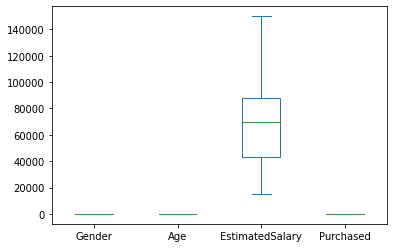

In [ ]:
df1.plot(kind='box')

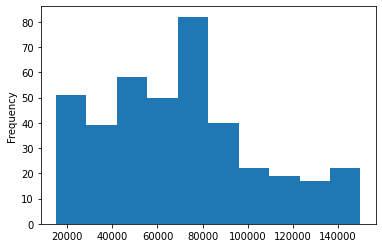

In [ ]:
df1['EstimatedSalary'].plot(kind='hist')

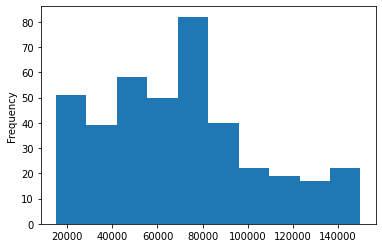

In [ ]:
df1['EstimatedSalary'].plot(kind='hist')

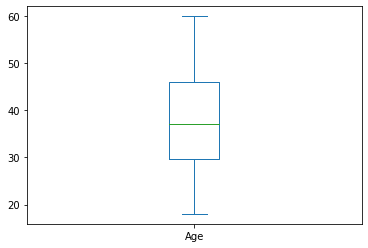

In [ ]:
df1['Age'].plot(kind='box')

Os gráficos não mostram nenhum outlier. Além de na função describe(), a coluna 'EstimatedSlary' apesar de apresentar um desvio padrão alto, a média fica muito próxima ao 50%, além de ser uma coluna que represanta o salário em determinada moeda dos diversos clientes, logo sendo compreensível os grandes espaços entre salários. Então, acredito que não seja necessário mais nenhuma procura por outliers.




### Procura por valores nulos

In [ ]:
df1.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Nenhum valor nulo, logo não é necessário mais nenhuma procura.

### Verificação de balanceamento/desbalenceamento

In [ ]:
df1.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

Necessário desbalancear depois da divisão treinamento/teste.

### Verificação da importância das colunas

In [ ]:
df2 = df1.copy()

In [ ]:
X = df2.drop('Purchased', axis=1)
y = df2['Purchased']


X_train, X_test, y_train, y_test = train_test_split(X, y) 

model = RandomForestClassifier()
model.fit(X_train, y_train)

for i in range(len(df2.columns)-1):
   print(f'Feature: {df2.columns[i]} {model.feature_importances_[i]}')

Feature: Gender 0.009635928146147449
Feature: Age 0.5150980950211188
Feature: EstimatedSalary 0.47526597683273375


A coluna 'Gender' tem pouca importância para o resultado, mas pelo fato do dataset ter apenas 4 colunas ao todo, vou deixar a coluna 'Gender'.